In [2]:
pip install earthpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install rioxarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install GeoPandas

Note: you may need to restart the kernel to use updated packages.


# Subtract One Raster from Another

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [3]:
# Define relative path to file
lidar_dem_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

# Open lidar dem
lidar_dem_xr = rxr.open_rasterio(lidar_dem_path, masked=True).squeeze()
lidar_dem_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

# Import Digital Surface Model (DSM)

In [4]:
# Define relative path to file
lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DSM.tif")

# Open lidar dem
lidar_dsm_xr = rxr.open_rasterio(lidar_dsm_path, masked=True).squeeze()
lidar_dsm_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

# Canopy Height Model

In [5]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      lidar_dem_xr.rio.bounds() == lidar_dsm_xr.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      lidar_dem_xr.rio.resolution() == lidar_dsm_xr.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


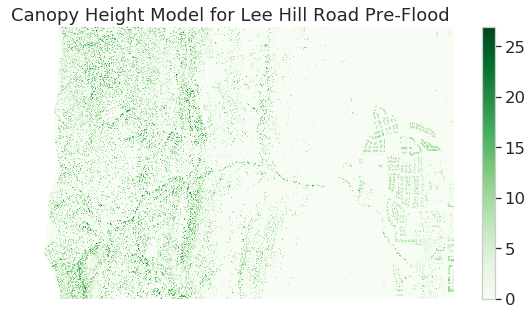

In [6]:
# Calculate canopy height model
lidar_chm_xr = lidar_dsm_xr - lidar_dem_xr

# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_xr.plot(cmap="Greens")
ax.set(title="Canopy Height Model for Lee Hill Road Pre-Flood")
ax.set_axis_off()
plt.show()

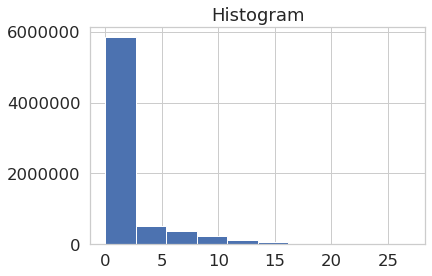

In [7]:
lidar_chm_xr.plot.hist()
plt.show()

In [8]:
print('CHM minimum value: ', np.nanmin(lidar_chm_xr))
print('CHM max value: ', np.nanmax(lidar_chm_xr))

CHM minimum value:  0.0
CHM max value:  26.9300537109375


# Export a Raster to Geotiff Using RioXarray

In [9]:
# check for and create an outputs directory
data_path = os.path.join("colorado-flood",
                         "spatial",
                         "outputs")

if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)
    
    ## The directory colorado-flood/spatial/outputs exists!

The directory colorado-flood/spatial/outputs exists!


In [10]:
# Make sure that your output data has a crs & no data value defined
print("The crs is", lidar_chm_xr.rio.crs)
print("The no data value is", lidar_chm_xr.rio.nodata)

## The crs is EPSG:32613
## The no data value is None

The crs is EPSG:32613
The no data value is None


In [11]:
#Create the path to a new tif file.
pre_chm_data_path = os.path.join(data_path, "pre-flood-chm.tif")
pre_chm_data_path

'colorado-flood/spatial/outputs/pre-flood-chm.tif'

In [12]:
# Export data to geotiff
lidar_chm_xr.rio.to_raster(pre_chm_data_path)

In [13]:
# Reopen the data
lidar_chm_data = rxr.open_rasterio(pre_chm_data_path, masked=True).squeeze()
lidar_chm_data

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

## View the crs and 'no data value'

In [14]:
print("The crs is", lidar_chm_data.rio.crs)
print("The no data value is", lidar_chm_data.rio.nodata)

The crs is EPSG:32613
The no data value is None


## Are these correct?

These are correct. This data is exported by a raster file to the Geotiff format using rioXarray. They are the same as raster file 
(lidar_chm_xr). the crs of a spatial object tells python where the raster is located in geographic space. In this case, the crs is 
EPSG: 32613. no data value is none. no empty data value.

## View the x and y spatial resolution.

In [15]:
print("The x and y spatial resolution:", lidar_chm_data.rio.resolution())

The x and y spatial resolution: (1.0, -1.0)


Explaination: this resolution represents the area on the ground that each pixel covers. The unit for this data are in meters as 
    determine by the crs above. In this case, the data resolution means that each pixel represents a 1*1 meters area on the ground. 

## Plot the data using a color bar of your choice.

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_data.plot(cmap="Blues")
ax.set(title="Canopy Height Model \n for Lee Hill Road Pre-Flood")
ax.set_axis_off()
plt.show()

Using a different color and add title.